# Mapping current yarn shops vs population

In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
import numpy as np


# County mapping

In [2]:
# Read in county shapefile

counties = gpd.read_file('../data/tl_2017_us_county/tl_2017_us_county.shp')
print(counties.crs)
counties.head(2)

epsg:4269


,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477641638,10701538,+41.9158651,-096.7885168,"POLYGON ((-97.01952 42.00410, -97.01952 42.004..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680956787,61588406,+46.2946377,-123.4244583,"POLYGON ((-123.43639 46.23820, -123.44759 46.2..."


In [3]:
counties.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3233 entries, 0 to 3232
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   3233 non-null   object  
 1   COUNTYFP  3233 non-null   object  
 2   COUNTYNS  3233 non-null   object  
 3   GEOID     3233 non-null   object  
 4   NAME      3233 non-null   object  
 5   NAMELSAD  3233 non-null   object  
 6   LSAD      3233 non-null   object  
 7   CLASSFP   3233 non-null   object  
 8   MTFCC     3233 non-null   object  
 9   CSAFP     1231 non-null   object  
 10  CBSAFP    1899 non-null   object  
 11  METDIVFP  113 non-null    object  
 12  FUNCSTAT  3233 non-null   object  
 13  ALAND     3233 non-null   int64   
 14  AWATER    3233 non-null   int64   
 15  INTPTLAT  3233 non-null   object  
 16  INTPTLON  3233 non-null   object  
 17  geometry  3233 non-null   geometry
dtypes: geometry(1), int64(2), object(15)
memory usage: 454.8+ KB


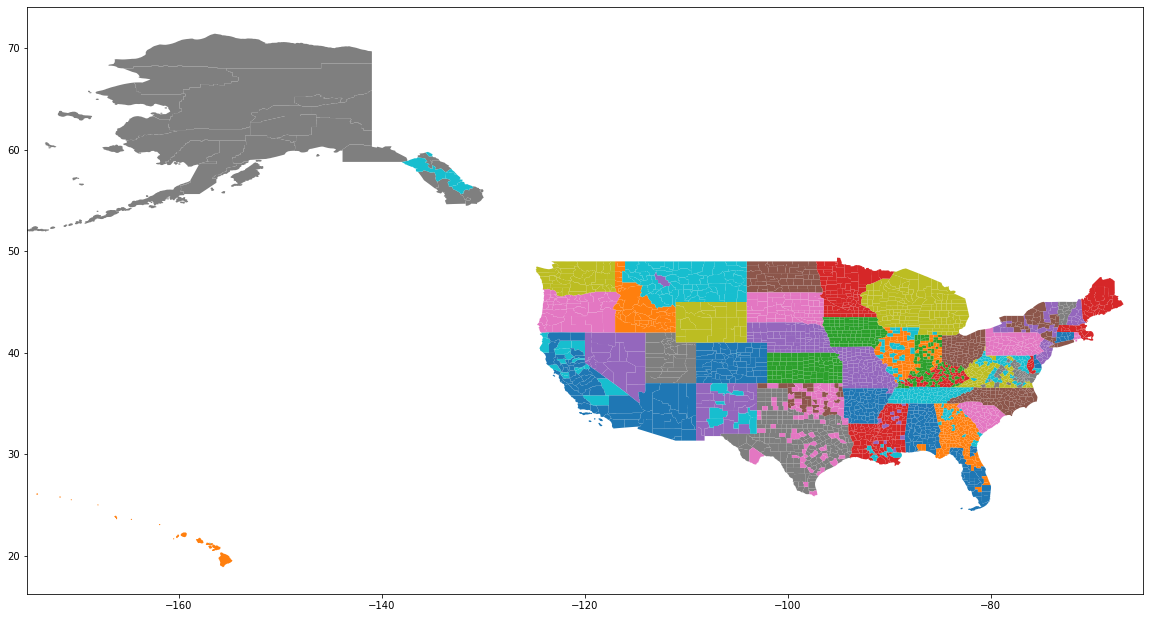

In [4]:
#take FIPS for territories and drop based on STATEFP column
territories_list = ['60', '66', '69', '72', '78']

counties = counties[~counties['STATEFP'].isin(territories_list)]

fig, ax = plt.subplots(figsize = (20, 20))

counties.plot(column = 'COUNTYNS', ax = ax)

# to tighten the map
plt.xlim(-175, -65);


In [5]:
counties = counties[['STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEOID', 'NAME', 'geometry']]
counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,geometry
0,31,039,00835841,31039,Cuming,"POLYGON ((-97.01952 42.00410, -97.01952 42.004..."
1,53,069,01513275,53069,Wahkiakum,"POLYGON ((-123.43639 46.23820, -123.44759 46.2..."
2,35,011,00933054,35011,De Baca,"POLYGON ((-104.56739 33.99757, -104.56772 33.9..."
3,31,109,00835876,31109,Lancaster,"POLYGON ((-96.91060 40.95841, -96.91060 40.958..."
4,31,129,00835886,31129,Nuckolls,"POLYGON ((-98.27367 40.08940, -98.27367 40.089..."


# Shop info

In [6]:
shops_df = pd.read_csv('../data/df_shops_clean2.csv')
shops_df.head(2)


,address,city,id,latitude,location,longitude,name,pos_online,ravelry_retailer,shop_email,zip,country,state
0,817B Regal Drive,Huntsville,9966,34.7091,"817B Regal Drive, Huntsville, Alabama",-86.5875,Fiber Art Work,True,True,fiberartwork@gmail.com,35801,United States,Alabama
1,"25219 Hwy 195, P.O. Box 392 (for mailing)",Double Springs,11655,34.1465,"25219 Hwy 195, P.O. Box 392 (for mailing), Dou...",-87.4022,Fine Yarns on Main,False,True,fineyarnsonmain@gmail.com,35553,United States,Alabama


In [7]:
# create geometry column

shops_df['geometry'] = shops_df.apply(lambda x: Point((float(x.longitude),
                                                       float(x.latitude))),
                                      axis=1)
shops_df.head(3)

,address,city,id,latitude,location,longitude,name,pos_online,ravelry_retailer,shop_email,zip,country,state,geometry
0,817B Regal Drive,Huntsville,9966,34.7091,"817B Regal Drive, Huntsville, Alabama",-86.5875,Fiber Art Work,True,True,fiberartwork@gmail.com,35801,United States,Alabama,POINT (-86.58750000000001 34.7091)
1,"25219 Hwy 195, P.O. Box 392 (for mailing)",Double Springs,11655,34.1465,"25219 Hwy 195, P.O. Box 392 (for mailing), Dou...",-87.4022,Fine Yarns on Main,False,True,fineyarnsonmain@gmail.com,35553,United States,Alabama,POINT (-87.40219999999999 34.1465)
2,15314 Court Street,Moulton,8023,34.4825,"15314 Court Street, Moulton, Alabama",-87.2766,Granny’s Quilt Shop,False,False,NaN,35650,United States,Alabama,POINT (-87.2766 34.4825)


In [8]:
# create geodataframe from shops

shop_geo = gpd.GeoDataFrame(shops_df,
                            crs = counties.crs,
                            geometry = shops_df['geometry'])


In [9]:
type(shop_geo)

geopandas.geodataframe.GeoDataFrame

In [10]:
# combine with spatial join

shops_by_county = gpd.sjoin(shop_geo, counties, op = 'within')
shops_by_county.head()

,address,city,id,latitude,location,longitude,name,pos_online,ravelry_retailer,shop_email,zip,country,state,geometry,index_right,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME
0,817B Regal Drive,Huntsville,9966,34.7091,"817B Regal Drive, Huntsville, Alabama",-86.5875,Fiber Art Work,True,True,fiberartwork@gmail.com,35801,United States,Alabama,POINT (-86.58750 34.70910),2123,01,089,00161570,01089,Madison
3,105 D Church Street,Madison,12262,34.6946,"105 D Church Street, Madison, Alabama",-86.7487,Hook A Frog Fiber & Fun,True,False,hookafrog@gmail.com,35758,United States,Alabama,POINT (-86.74870 34.69460),2123,01,089,00161570,01089,Madison
7,133 McKee Road,Harvest,8619,34.8818,"133 McKee Road, Harvest, Alabama",-86.7184,North Alabama Imports / Little Barn,True,False,NaN,35749,United States,Alabama,POINT (-86.71840 34.88180),2123,01,089,00161570,01089,Madison
9,"2211 Seminole Drive SW, Studio 103",Huntsville,13306,34.7154,"2211 Seminole Drive SW, Studio 103, Huntsville...",-86.5970,SPARKLE Studio,True,True,amy@thatsparklestudio.com,35805,United States,Alabama,POINT (-86.59700 34.71540),2123,01,089,00161570,01089,Madison
1,"25219 Hwy 195, P.O. Box 392 (for mailing)",Double Springs,11655,34.1465,"25219 Hwy 195, P.O. Box 392 (for mailing), Dou...",-87.4022,Fine Yarns on Main,False,True,fineyarnsonmain@gmail.com,35553,United States,Alabama,POINT (-87.40220 34.14650),1069,01,133,00161592,01133,Winston


In [11]:
shops_by_county.GEOID.value_counts()
# go back to cleaning and check for duplicates

06037    33
53033    27
25017    19
23005    19
27053    18
         ..
47007     1
12061     1
12037     1
08051     1
30065     1
Name: GEOID, Length: 937, dtype: int64

In [12]:
shops_by_county.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2093 entries, 0 to 2090
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   address           2042 non-null   object  
 1   city              2093 non-null   object  
 2   id                2093 non-null   int64   
 3   latitude          2093 non-null   float64 
 4   location          2093 non-null   object  
 5   longitude         2093 non-null   float64 
 6   name              2093 non-null   object  
 7   pos_online        2093 non-null   bool    
 8   ravelry_retailer  2093 non-null   bool    
 9   shop_email        1085 non-null   object  
 10  zip               2052 non-null   object  
 11  country           2093 non-null   object  
 12  state             2091 non-null   object  
 13  geometry          2093 non-null   geometry
 14  index_right       2093 non-null   int64   
 15  STATEFP           2093 non-null   object  
 16  COUNTYFP        

In [13]:
# LA - 36 listings
shops_la = shops_by_county.loc[shops_by_county.GEOID == '06037']

In [14]:
# Seattle - 29 listings
shops_seattle = shops_by_county.loc[shops_by_county.GEOID == '53033']

In [15]:
shops_middlesex = shops_by_county.loc[shops_by_county.GEOID == '25017']

In [16]:
# defining variables for map

polygon_county = counties.loc[counties['GEOID'] == '06037']
center = polygon_county.geometry.centroid
area_center = [center.y, center.x]
shops_county = shops_la

In [17]:
# mapping shops with folium - LA as example

# create map centered on area
map_county = folium.Map(location = area_center, zoom_start = 9)

# add county polygon to map
folium.GeoJson(polygon_county).add_to(map_county)

# iterate through shops to place points on map, popup marker for shop name
for row_index, row_values in shops_county.iterrows():
    loc = [row_values['latitude'], row_values['longitude']]
    pop = str(row_values['name'])
    marker = folium.Marker(
        location = loc, 
        popup = pop) 
    
    marker.add_to(map_county)
map_county.save('../maps/map_la.html')

map_county

In [18]:
# mapping shops with folium - King county (Seattle)

# defining variables for map
polygon_county = counties.loc[counties['GEOID'] == '53033']
center = polygon_county.geometry.centroid
area_center = [center.y, center.x]
shops_county = shops_seattle

# create map centered on area
map_county = folium.Map(location = area_center, zoom_start = 9)

# add county polygon to map
folium.GeoJson(polygon_county).add_to(map_county)

# iterate through shops to place points on map, popup marker for shop name
for row_index, row_values in shops_county.iterrows():
    loc = [row_values['latitude'], row_values['longitude']]
    pop = str(row_values['name'])
    marker = folium.Marker(
        location = loc, 
        popup = pop) 
    
    marker.add_to(map_county)
map_county.save('../maps/map_seattle.html')

map_county

In [19]:
# mapping shops with folium - Middlesex county (part of Boston metro area)

# defining variables for map
polygon_county = counties.loc[counties['GEOID'] == '25017']
center = polygon_county.geometry.centroid
area_center = [center.y, center.x]
shops_county = shops_middlesex

# create map centered on area
map_county = folium.Map(location = area_center, zoom_start = 10)

# add county polygon to map
folium.GeoJson(polygon_county).add_to(map_county)

# iterate through shops to place points on map, popup marker for shop name
for row_index, row_values in shops_county.iterrows():
    loc = [row_values['latitude'], row_values['longitude']]
    pop = str(row_values['name'])
    marker = folium.Marker(
        location = loc, 
        popup = pop) 
    
    marker.add_to(map_county)
map_county.save('../maps/map_middlesex.html')

map_county

In [20]:
# this could be useful to display information at country level - markers would be clustered showing how many shops
# in a county, then can have county-level maps of the highest concentration ready to go

# mapping shops with folium
# using cluster markers

# defining variables for map
area_center = ['39.50', '-98.35']
shops_country = shops_by_county

# create map centered on area
clustermap_country = folium.Map(location = area_center, zoom_start = 4)

#create a marker cluster
marker_cluster = MarkerCluster().add_to(clustermap_country)

# add county polygon to map
#folium.GeoJson(polygon_county).add_to(clustermap_county)

# iterate through shops to place points on map, popup marker for shop name
for row_index, row_values in shops_by_county.iterrows():
    loc = [row_values['latitude'], row_values['longitude']]
    pop = str(row_values[['name', 'address', 'city']])
    marker = folium.Marker(
        location = loc, 
        popup = pop) 
    
    marker.add_to(marker_cluster)

clustermap_country.save('../maps/mapcountry.html')

clustermap_country

In [23]:
# save shops_by_county dataframe to csv

shops_by_county.to_csv('../data/df_shops_by_county.csv', index = False)